# Analysis of Games from the Apple Store

 > This dataset was taken from [Kaggle](https://www.kaggle.com/tristan581/17k-apple-app-store-strategy-games) and it was collected on the 3rd of August 2019 using the [iTunes API](https://affiliate.itunes.apple.com/resources/documentation/itunes-store-web-service-search-api/) and the [App Store sitemap](https://apps.apple.com/us/genre/ios-games/id6014).
 
The dataset contains 18 columns:
 - **URL**: _URL of the app._
 - **ID**: _ID of the game._
 - **Name**: _Name of the game._
 - **Subtitle**: _Advertisement text of the game._
 - **Icon URL**: _Icon of the game, 512x512 pixels jpg._
 - **Average User Rating**: _Rounded to nearest .5. Requires at least 5 ratings._
 - **User Rating Count**: _Total of user ratings. Null values means it is below 5._
 - **Price**: _Price in USD._
 - **In-app Purchases**: _Prices of available in-app purchases._
 - **Description**: _Game description._
 - **Developer**: _Game developer._
 - **Age Rating**: _Age to play the game. Either 4+, 9+, 12+or 17+._
 - **Languages**: _Languages the game supports in ISO Alpha-2 codes._
 - **Size**: _Size in bytes._
 - **Genre**: _Main genre of the game._
 - **Primary Genre**: _All genre the game fits in._
 - **Original Release Date**: _Date the game was released._
 - **Current Version Release Date**: _Date of last update._
 
The questions we are going to answer are:

    1. Does the advance in technology impact the size of the apps?
    2. Does the advance in technology impact the amount of apps being produced?
    3. Are most apps free or paid and which category is more popular?
    4. Is there a better one between free or paid apps?
    5. How is the distribution of the age restriction?
    6. Do most games offer more than one language?
    
#### Below is the sequence I will be following:
    1. Reading and Understanding the Data
    2. Exploratory analysis
         -> Missing data
         -> Data types in the dataframe
         -> Sorting by a desired column
         -> Saving a new file after this job is done
    3. Graphics and insights
    
## Important note
 > **This notebook is intended exclusively to practicing and learning purposes. Any corrections, comments and suggestions are more than welcome and I would really appreciate it. Feel free to get in touch if you liked it or if you want to colaborate somehow.**

# 1. Reading and Understanding the Data

In [1]:
# Important imports for the analysis of the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Show the plot in the same window as the notebook
%matplotlib inline

In [2]:
# Create the dataframe and check the first 8 rows
app_df = pd.read_csv("appstore_games.csv")
app_df.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [3]:
# Dropping columns that I will not use for this analysis
app_df_cut = app_df.drop(columns=['URL', 'Subtitle', 'Icon URL'])

# 2. Exploratory Analysis

In [4]:
app_df_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            17007 non-null  int64  
 1   Name                          17007 non-null  object 
 2   Average User Rating           7561 non-null   float64
 3   User Rating Count             7561 non-null   float64
 4   Price                         16983 non-null  float64
 5   In-app Purchases              7683 non-null   object 
 6   Description                   17007 non-null  object 
 7   Developer                     17007 non-null  object 
 8   Age Rating                    17007 non-null  object 
 9   Languages                     16947 non-null  object 
 10  Size                          17006 non-null  float64
 11  Primary Genre                 17007 non-null  object 
 12  Genres                        17007 non-null  object 
 13  O

***

From the above cell I understand that I should take a closer look into the columns listed below because they have some missing values:
 - Average User Rating
 - User Rating Count
 - Price
 - Languages
 
Another important thing to check is if there are any **duplicate ID's** and, if so, remove them. Also, the last two column are not *datetime* type, which they should be.

The dataframe will be sorted by the "User Rating Count" column. This column will be our guide to conclude if a game is successful or not.

In [5]:
# Most reviewed app
#app_df_cut.iloc[app_df_cut["User Rating Count"].idxmax()]

# A better way of seeing the most reviwed apps 
app_df_cut = app_df_cut.sort_values(by="User Rating Count", ascending=False)
app_df_cut.head(5)

,ID,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
1378,529479190,Clash of Clans,4.5,3032734.0,0.0,"4.99, 9.99, 19.99, 0.99, 4.99, 0.99, 49.99, 99...","""Join millions of players worldwide as you bui...",Supercell,9+,"AR, NL, EN, FI, FR, DE, ID, IT, JA, KO, MS, NB...",1.612196e+08,Games,"Games, Action, Entertainment, Strategy",2/08/2012,20/06/2019
7187,1053012308,Clash Royale,4.5,1277095.0,0.0,"4.99, 0.99, 9.99, 19.99, 9.99, 4.99, 0.99, 19....","""Enter the Arena! From the creators of Clash o...",Supercell,9+,"AR, NL, EN, FR, DE, IT, JA, KO, NB, PT, RU, ZH...",1.451080e+08,Games,"Games, Strategy, Entertainment, Action",2/03/2016,1/08/2019
13414,1330123889,PUBG MOBILE,4.5,711409.0,0.0,"0.99, 9.99, 0.99, 9.99, 24.99, 4.99, 2.99, 99....",The official mobile version of PlayerUnknown\'...,Tencent Mobile International Limited,17+,"ZH, EN, FR, DE, ID, PT, RU, ZH, ES, TH, ZH, TR",2.384082e+09,Games,"Games, Action, Strategy",19/03/2018,12/06/2019
1921,597986893,Plants vs. Zombies\u2122 2,4.5,469562.0,0.0,"4.99, 2.99, 9.99, 9.99, 4.99, 3.99, 3.99, 1.99...","""As beautifully presented as it is absorbing t...",PopCap,9+,"EN, FR, DE, IT, PT, ES",1.207634e+08,Games,"Games, Strategy, Entertainment, Adventure",15/08/2013,29/07/2019
8139,1094591345,Pok\xe9mon GO,3.5,439776.0,0.0,"0.99, 4.99, 9.99, 19.99, 39.99, 99.99",NEW! Team GO Rocket has invaded the world of P...,"Niantic, Inc.",9+,"EN, FR, DE, IT, JA, KO, PT, ES, ZH",2.815212e+08,Games,"Games, Strategy, Role Playing, Health & Fitness",7/07/2016,2/08/2019


### Rating columns
> I'm going to consider that all the NaN values in the "User Rating Count" column means that the game recieved no ratings and therefore is 0. If the app recieved no ratings, then the "Average User Rating" will also be zero for these games.

In [6]:
# Get the columns "User Rating Count" and "Average User Rating" where they are both equal to NaN and set the
# values to 0.
app_df_cut.loc[(app_df_cut["User Rating Count"].isnull()) | (app_df_cut["Average User Rating"].isnull()),
               ["Average User Rating", "User Rating Count"]] = 0

### In-app Purchases column
> I'm considering that the null values within the "In-app Purchases" column means that there are no in-app purchases available

**Different considerations could have been done, but I will continue with this one for now.**

In [7]:
# Get the column "In-app Purchases" where the value is NaN and set it to zero
app_df_cut.loc[app_df_cut["In-app Purchases"].isnull(),
               "In-app Purchases"] = 0

### ID column
> Let's check if there are missing or duplicate ID's in the dataset:

In [8]:
# Check if there are missing or 0 ID's
app_df_cut.loc[(app_df_cut["ID"] == 0) | (app_df_cut["ID"].isnull()),
              "ID"]

Series([], Name: ID, dtype: int64)

In [9]:
# Check for duplicates in the ID column
len(app_df_cut["ID"]) - len(app_df_cut["ID"].unique())

# The number of unique values is lower than the total amount of ID's, therefore there are duplicates among them. 

160

In [10]:
# Drop every duplicate ID row
app_df_cut.drop_duplicates(subset="ID", inplace=True)
app_df_cut.shape

(16847, 15)

### Size column
> I will check if there are any missing or 0 values in the size column. If so, they will be removed from the data since we cannot know it's value.

In [11]:
# Check if there are null values in the Size column
app_df_cut[(app_df_cut["Size"].isnull()) | (app_df_cut['Size'] == 0)]

,ID,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
16782,1469019441,Idle Mars Colonization,0.0,0.0,NaN,"0.99, 1.99, 4.99",You are an Idle game fan yet still want to pla...,mai phuong bui,4+,EN,NaN,Games,"Games, Strategy, Simulation",18/08/2019,18/08/2019


In [12]:
# Drop the only row in which the game has no size
app_df_cut.drop([16782], axis=0, inplace=True)

In [13]:
# Convert the size to MB
app_df_cut["Size"] = round(app_df_cut["Size"]/1000000)
app_df_cut.head(5)

,ID,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
1378,529479190,Clash of Clans,4.5,3032734.0,0.0,"4.99, 9.99, 19.99, 0.99, 4.99, 0.99, 49.99, 99...","""Join millions of players worldwide as you bui...",Supercell,9+,"AR, NL, EN, FI, FR, DE, ID, IT, JA, KO, MS, NB...",161.0,Games,"Games, Action, Entertainment, Strategy",2/08/2012,20/06/2019
7187,1053012308,Clash Royale,4.5,1277095.0,0.0,"4.99, 0.99, 9.99, 19.99, 9.99, 4.99, 0.99, 19....","""Enter the Arena! From the creators of Clash o...",Supercell,9+,"AR, NL, EN, FR, DE, IT, JA, KO, NB, PT, RU, ZH...",145.0,Games,"Games, Strategy, Entertainment, Action",2/03/2016,1/08/2019
13414,1330123889,PUBG MOBILE,4.5,711409.0,0.0,"0.99, 9.99, 0.99, 9.99, 24.99, 4.99, 2.99, 99....",The official mobile version of PlayerUnknown\'...,Tencent Mobile International Limited,17+,"ZH, EN, FR, DE, ID, PT, RU, ZH, ES, TH, ZH, TR",2384.0,Games,"Games, Action, Strategy",19/03/2018,12/06/2019
1921,597986893,Plants vs. Zombies\u2122 2,4.5,469562.0,0.0,"4.99, 2.99, 9.99, 9.99, 4.99, 3.99, 3.99, 1.99...","""As beautifully presented as it is absorbing t...",PopCap,9+,"EN, FR, DE, IT, PT, ES",121.0,Games,"Games, Strategy, Entertainment, Adventure",15/08/2013,29/07/2019
8139,1094591345,Pok\xe9mon GO,3.5,439776.0,0.0,"0.99, 4.99, 9.99, 19.99, 39.99, 99.99",NEW! Team GO Rocket has invaded the world of P...,"Niantic, Inc.",9+,"EN, FR, DE, IT, JA, KO, PT, ES, ZH",282.0,Games,"Games, Strategy, Role Playing, Health & Fitness",7/07/2016,2/08/2019


### Price column
   > Games with a missing value in the price column will be dropped

In [14]:
# Drop the row with NaN values in the "Price" column
app_df_cut = app_df_cut.drop(app_df_cut.loc[app_df_cut["Price"].isnull()].index)

### Languages column
> Games with a missing value in the "Languages" column will be dropped

In [15]:
# Drop the rows with NaN values in the "Languages" column
app_df_cut = app_df_cut.drop(app_df_cut.loc[app_df_cut["Languages"].isnull()].index)

In [16]:
app_df_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16763 entries, 1378 to 17006
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            16763 non-null  int64  
 1   Name                          16763 non-null  object 
 2   Average User Rating           16763 non-null  float64
 3   User Rating Count             16763 non-null  float64
 4   Price                         16763 non-null  float64
 5   In-app Purchases              16763 non-null  object 
 6   Description                   16763 non-null  object 
 7   Developer                     16763 non-null  object 
 8   Age Rating                    16763 non-null  object 
 9   Languages                     16763 non-null  object 
 10  Size                          16763 non-null  float64
 11  Primary Genre                 16763 non-null  object 
 12  Genres                        16763 non-null  object 
 13

### Age Rating column
   > I will pad the Age Rating column with a 0 to make it easier to sort the values later

In [17]:
# Put a 0 in front of evry value in the 'Age Rating column'
app_df_cut['Age Rating'] = app_df_cut['Age Rating'].str.pad(width=3, fillchar='0')

### Now that the dataset is organized, let's save it into a csv file so that we do not have to redo all the steps above

In [18]:
app_df_cut.to_csv("app_df_clean.csv", index=False)

In [19]:
app_df_clean = pd.read_csv("app_df_clean.csv")
app_df_clean.head()

,ID,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,529479190,Clash of Clans,4.5,3032734.0,0.0,"4.99, 9.99, 19.99, 0.99, 4.99, 0.99, 49.99, 99...","""Join millions of players worldwide as you bui...",Supercell,09+,"AR, NL, EN, FI, FR, DE, ID, IT, JA, KO, MS, NB...",161.0,Games,"Games, Action, Entertainment, Strategy",2/08/2012,20/06/2019
1,1053012308,Clash Royale,4.5,1277095.0,0.0,"4.99, 0.99, 9.99, 19.99, 9.99, 4.99, 0.99, 19....","""Enter the Arena! From the creators of Clash o...",Supercell,09+,"AR, NL, EN, FR, DE, IT, JA, KO, NB, PT, RU, ZH...",145.0,Games,"Games, Strategy, Entertainment, Action",2/03/2016,1/08/2019
2,1330123889,PUBG MOBILE,4.5,711409.0,0.0,"0.99, 9.99, 0.99, 9.99, 24.99, 4.99, 2.99, 99....",The official mobile version of PlayerUnknown\'...,Tencent Mobile International Limited,17+,"ZH, EN, FR, DE, ID, PT, RU, ZH, ES, TH, ZH, TR",2384.0,Games,"Games, Action, Strategy",19/03/2018,12/06/2019
3,597986893,Plants vs. Zombies\u2122 2,4.5,469562.0,0.0,"4.99, 2.99, 9.99, 9.99, 4.99, 3.99, 3.99, 1.99...","""As beautifully presented as it is absorbing t...",PopCap,09+,"EN, FR, DE, IT, PT, ES",121.0,Games,"Games, Strategy, Entertainment, Adventure",15/08/2013,29/07/2019
4,1094591345,Pok\xe9mon GO,3.5,439776.0,0.0,"0.99, 4.99, 9.99, 19.99, 39.99, 99.99",NEW! Team GO Rocket has invaded the world of P...,"Niantic, Inc.",09+,"EN, FR, DE, IT, JA, KO, PT, ES, ZH",282.0,Games,"Games, Strategy, Role Playing, Health & Fitness",7/07/2016,2/08/2019


In [20]:
# Transform the string dates into datetime objects
app_df_clean["Original Release Date"] = pd.to_datetime(app_df_clean["Original Release Date"])
app_df_clean["Current Version Release Date"] = pd.to_datetime(app_df_clean["Current Version Release Date"])

In [21]:
app_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16763 entries, 0 to 16762
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            16763 non-null  int64         
 1   Name                          16763 non-null  object        
 2   Average User Rating           16763 non-null  float64       
 3   User Rating Count             16763 non-null  float64       
 4   Price                         16763 non-null  float64       
 5   In-app Purchases              16763 non-null  object        
 6   Description                   16763 non-null  object        
 7   Developer                     16763 non-null  object        
 8   Age Rating                    16763 non-null  object        
 9   Languages                     16763 non-null  object        
 10  Size                          16763 non-null  float64       
 11  Primary Genre               

# 3. Graphics and Insights

### Evolution of the Apps' Size
> Do the apps get bigger with time?

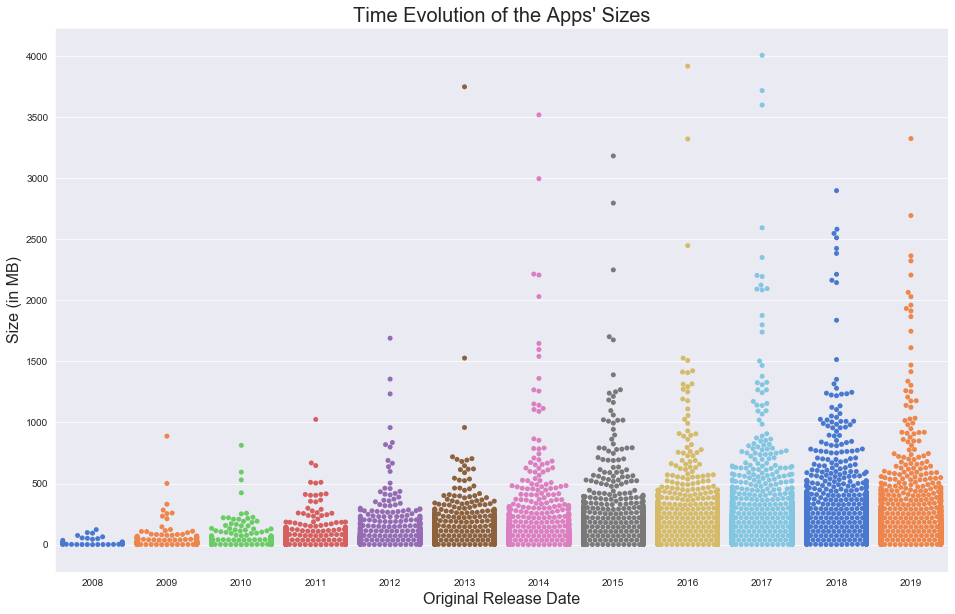

In [22]:
# Make the figure
plt.figure(figsize=(16,10))

# Variables
years = app_df_clean["Original Release Date"].apply(lambda date: date.year)
size = app_df_clean["Size"]

# Plot a swarmplot
palette = sns.color_palette("muted")
size = sns.swarmplot(x=years, y=size, palette=palette)
size.set_ylabel("Size (in MB)", fontsize=16)
size.set_xlabel("Original Release Date", fontsize=16)
size.set_title("Time Evolution of the Apps' Sizes", fontsize=20)

# Save the image. Has to be called before plt.show()
#plt.savefig("Time_Evol_App_Size.png", dpi=300)

plt.show()

> **With the advance in technology and the internet becoming cheaper and cheaper more people have access to faster networks. As the years go by, it can be seen in the graph above that the games' size gets bigger. Some games that have more than 2GB can be noted, reaching a maximum value of 4GB, but they are not the most common ones. As each game is represented by a different tiny ball in the graph above, the quantity of games seems to grow as well. Let's investigate the number of apps per year to be sure.**

### How does the Amount of Apps Released Change Over Time?

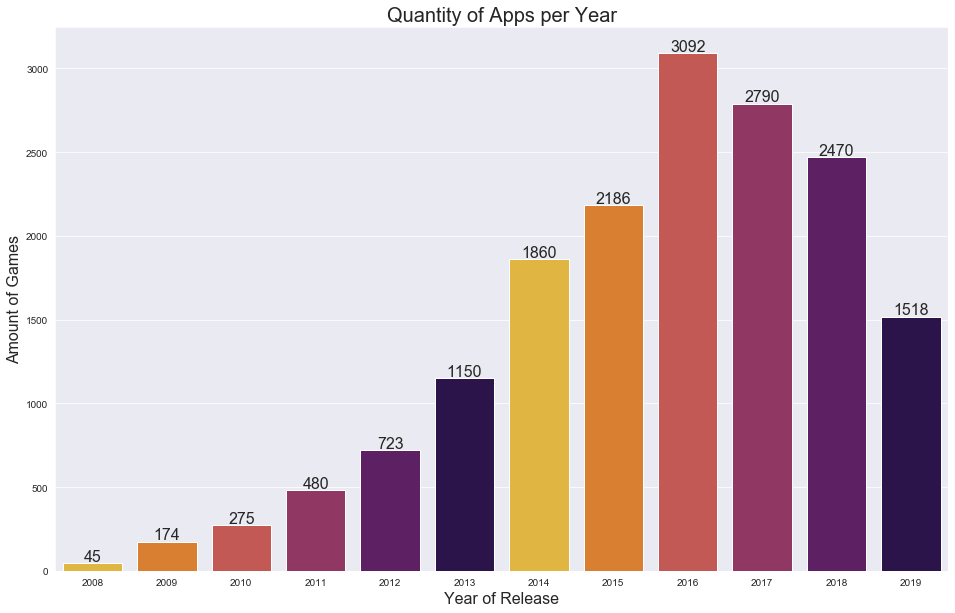

In [23]:
# Make the figure
plt.figure(figsize=(16,10))

# Plot a countplot
palette1 = sns.color_palette("inferno_r")
apps_per_year = sns.countplot(x=years, data=app_df_clean, palette=palette1)
apps_per_year.set_xlabel("Year of Release", fontsize=16)
apps_per_year.set_ylabel("Amount of Games", fontsize=16)
apps_per_year.set_title("Quantity of Apps per Year", fontsize=20)

# Write the height of each bar on top of them
for p in apps_per_year.patches:
    apps_per_year.annotate("{}".format(p.get_height()),
                          (p.get_x() + p.get_width() / 2, p.get_height() + 40),
                          va="center", ha="center", fontsize=16)

# Save the figure   
#plt.savefig("Quantity_Apps_Per_Year.png", dpi=300)

> **From 2008 to 2016 we can identify a drastic increase in the number of games released each year in which the highest increase occurs between the years 2015 and 2016. After 2016 the amount of games released per year starts to drop down almost linearly for 2 years (2019 cannot be considered yet because the data was collected in August, 4 months of data of the current year is missing).**
>
> **Without further analysis, I would argue that after a boom in the production of apps it gets harder to come up with new ideas that are not out there already, making the production and release of new games slow down, but it is important to keep in mind that without further research it cannot be taken as the right explanation.**

In [24]:
#Make a list of years from 2014 to 2018
years_lst = [year for year in range(2014,2019)]

#For loop to get a picture of the amount of games produced from August to December
for year in years_lst:
    from_August = app_df_clean["Original Release Date"].apply(lambda date: (date.year == year) & (date.month >= 8)).sum()
    total = app_df_clean["Original Release Date"].apply(lambda date: date.year == year).sum()
    print("In {year}, {percentage}% games were produced from August to December."
          .format(year=year,
                  percentage=round((from_August/total)*100, 1)))

In 2014, 44.1% games were produced from August to December.
In 2015, 42.2% games were produced from August to December.
In 2016, 39.9% games were produced from August to December.
In 2017, 40.8% games were produced from August to December.
In 2018, 42.4% games were produced from August to December.


> **Having checked the previous five years we can see that the amount of games released from August to December represents a significant portion of the whole and that it can be considered roughly constant at 42%. Nevertheless, the last two years show a tendency for a linear decrease in the quantity of games released per year and taking into account that we still have 42% of the games of this year to be released, the total amount in the present year (2019) would be 2617. This is bigger than 2018, but this was not an elaborate calculation as we took the average of games being prouced between the months 8-12 to be 42%.**

### Now, can we observe a trend in the age restriction of games released each year?

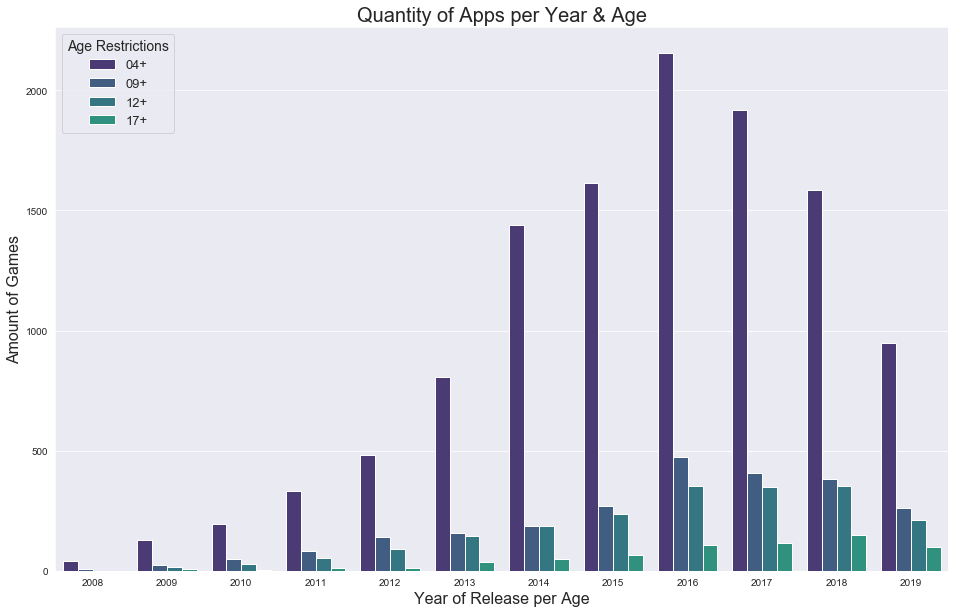

In [25]:
# Make the figure
plt.figure(figsize=(16,10))

# Variables. Sort by age to put the legend in order.
data = app_df_clean.sort_values(by='Age Rating')

# Plot a countplot
palette1 = sns.color_palette("viridis")
apps_per_year = sns.countplot(x=years, data=data, palette=palette1, hue='Age Rating')
apps_per_year.set_xlabel("Year of Release per Age", fontsize=16)
apps_per_year.set_ylabel("Amount of Games", fontsize=16)
apps_per_year.set_title("Quantity of Apps per Year & Age", fontsize=20)

plt.legend(title='Age Restrictions', fontsize=13, title_fontsize=14, loc='upper left')
# Save the figure   
#plt.savefig("Quantity_Apps_Per_Year_&_Age.png", dpi=300)

plt.show()

> **As shown above, most apps tend to target all ages.**

### The amount of apps had a considerable increase in the past years indicating that producing an app has been a trend and possibly a lucrative market. That being said, it is important to analyse if there is a preference for free or paid games and the range of prices they are in.

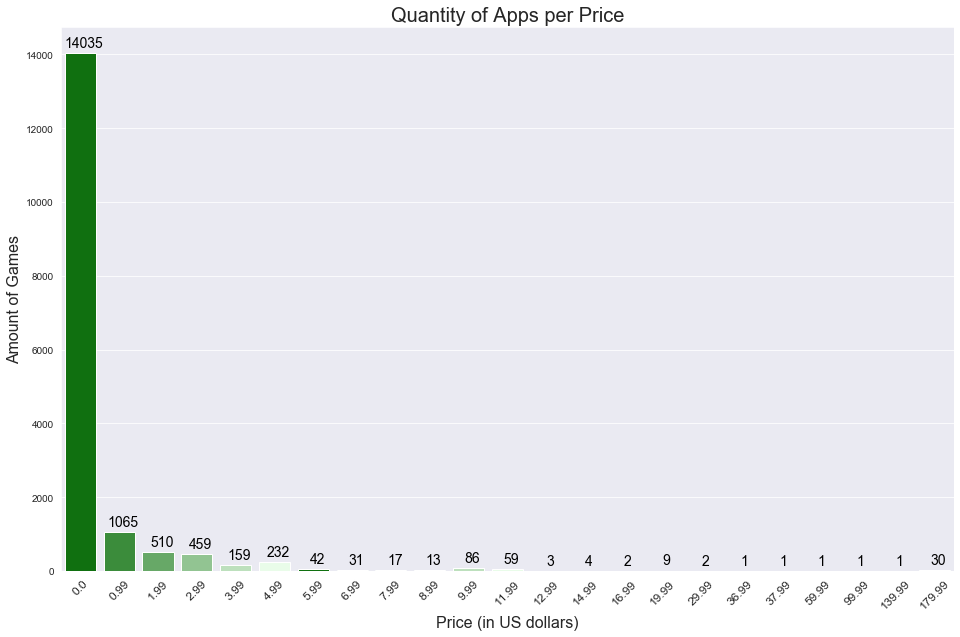

In [26]:
# Make the figure
plt.figure(figsize=(16,10))

# Variables
price = app_df_clean["Price"]

# Plot a Countplot
palette2 = sns.light_palette("green", reverse=True)
price_vis = sns.countplot(x=price, palette=palette2)
price_vis.set_xlabel("Price (in US dollars)", fontsize=16)
price_vis.set_xticklabels(price_vis.get_xticklabels(), fontsize=12, rotation=45)
price_vis.set_ylabel("Amount of Games", fontsize=16)
price_vis.set_title("Quantity of Apps per Price", fontsize=20)

# Write the height of the bars on top
for p in price_vis.patches:
    price_vis.annotate("{:.0f}".format(p.get_height()), # Text that will appear on the screen
                       (p.get_x() + p.get_width() / 2 + 0.1, p.get_height()), # (x, y) has to be a tuple
                       ha='center', va='center', fontsize=14, color='black', xytext=(0, 10), # Customizations
                       textcoords='offset points')

# Save the figure
#plt.savefig("Quantity_Each_App_Per_Price.png", dpi=300)

> **We can see that the majority of the games are free. That leads me to analyse if the free apps have more in-app purchases then the paid ones, meaning that this might be their source of income.**

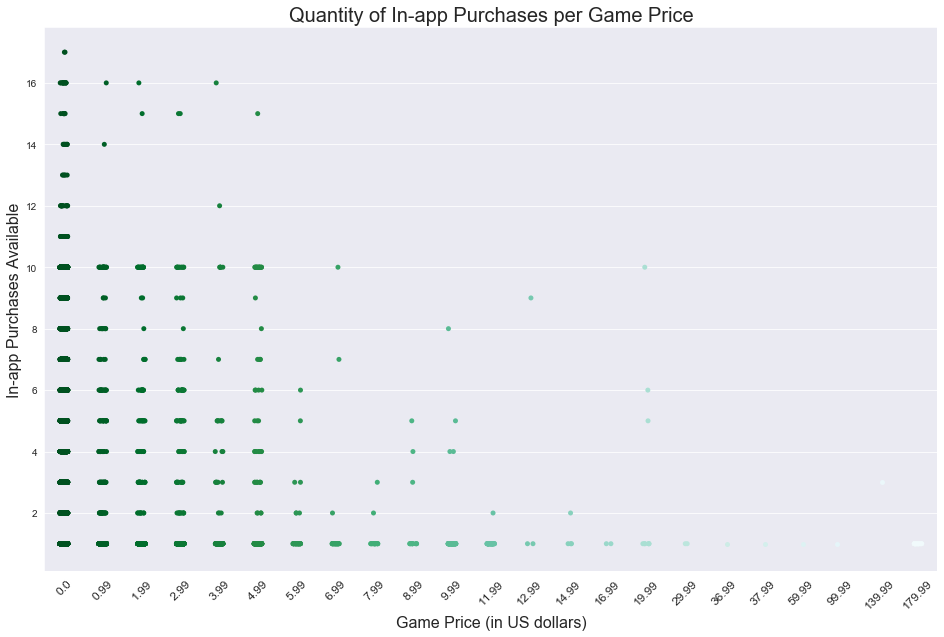

In [27]:
# Make the figure
plt.figure(figsize=(16,10))

# Variables
in_app_purchases = app_df_clean["In-app Purchases"].str.split(",").apply(lambda lst: len(lst))

# Plot a stripplot
palette3 = sns.color_palette("BuGn_r", 23)
in_app_purchases_vis = sns.stripplot(x=price, y=in_app_purchases, palette=palette3)
in_app_purchases_vis.set_xlabel("Game Price (in US dollars)", fontsize=16)
in_app_purchases_vis.set_xticklabels(in_app_purchases_vis.get_xticklabels(), fontsize=12, rotation=45)
in_app_purchases_vis.set_ylabel("In-app Purchases Available", fontsize=16)
in_app_purchases_vis.set_title("Quantity of In-app Purchases per Game Price", fontsize=20)

# Save the image. Has to be called before plt.show()
#plt.savefig("Quantity_In_App_Purchase.png", dpi=300)

plt.show()

> **As expected, free and lower-priced apps provide more items to be purchased than expensive games. Two reasons can be named:**
>
>> **1.The developers have to invest money into making the games and updating them, therefore they need a source of income. In the case of free games, this comes with the in-app purchases available.**
>
>> **2. People who have spent a lot of money on an app would not be happy or willing to spend more, given that they have already made an initial high investment.**

### We know that most of the apps are free. Let's see if there are any links between an app being paid and being better than the free ones:

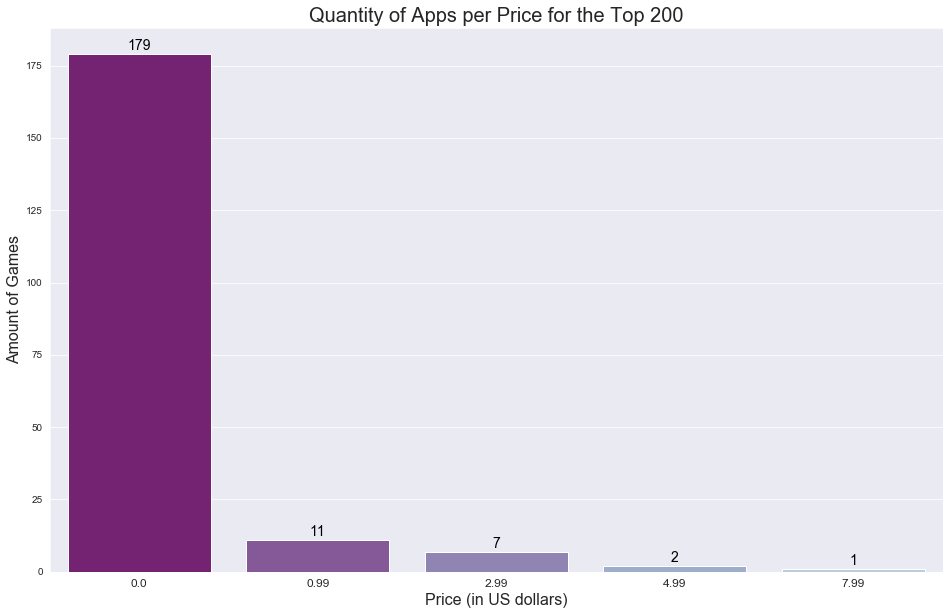

In [28]:
# Plot a distribution of the top 200 apps by their price

# Make the figure
plt.figure(figsize=(16,10))

# Plot a Countplot
palette4 = sns.color_palette("BuPu_r")
top_prices = sns.countplot(app_df_clean.iloc[:200]["Price"], palette=palette4)
top_prices.set_xlabel("Price (in US dollars)", fontsize=16)
top_prices.set_xticklabels(top_prices.get_xticklabels(), fontsize=12)
top_prices.set_ylabel("Amount of Games", fontsize=16)
top_prices.set_title("Quantity of Apps per Price for the Top 200", fontsize=20)

# Write the height of the bars on top
for p in top_prices.patches:
    top_prices.annotate("{:.0f}".format(p.get_height()), 
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=14, color='black', xytext=(0, 8),
                        textcoords='offset points')
    
# Save the image.
#plt.savefig("Quantity_App_Per_Price.png", dpi=300)

> **The graph above shows that among the top 200 games, the vast majority are free. This result makes sense considering you don't have to invest any money to start playing and can spend afterward if you would like to invest in it.**

### Even though most games are free we should take a look if a type of app (paid or free) is better. Let's do that by checking the average user rating.

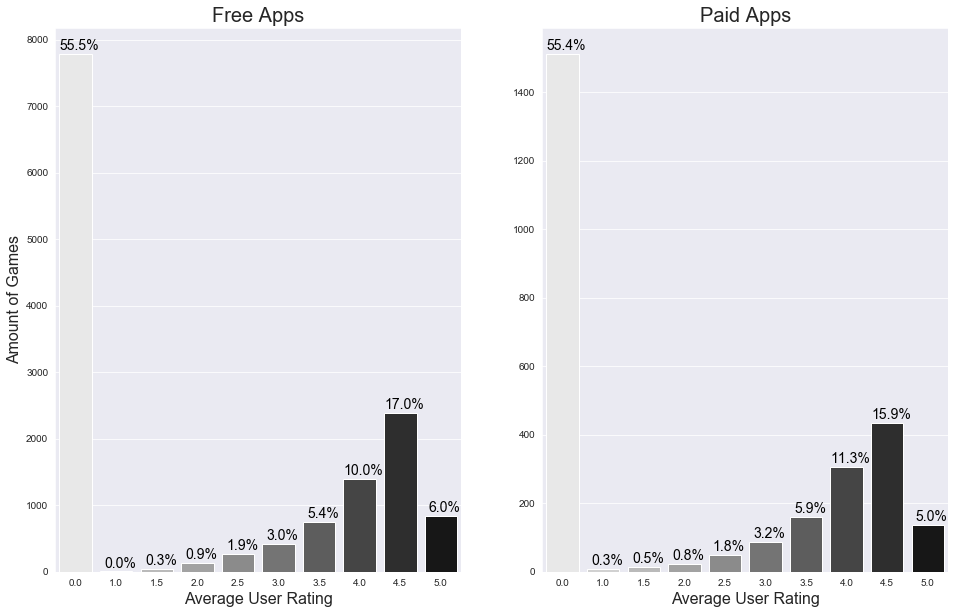

In [29]:
# Create the DataFrames needed
paid = app_df_clean[app_df_clean["Price"] > 0]
total_paid = len(paid)
free = app_df_clean[app_df_clean["Price"] == 0]
total_free = len(free)

# Make the figure and the axes (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16,10))
palette5 = sns.color_palette("gist_yarg", 10)

# Free apps countplot
free_vis = sns.countplot(x="Average User Rating", data=free, ax=axes[0], palette=palette5)
free_vis.set_xlabel("Average User Rating", fontsize=16)
free_vis.set_ylabel("Amount of Games", fontsize=16)
free_vis.set_title("Free Apps", fontsize=20)

# Display the percentages on top of the bars
for p in free_vis.patches:
     free_vis.annotate("{:.1f}%".format(100 * (p.get_height()/total_free)),
                       (p.get_x() + p.get_width() / 2 + 0.1, p.get_height()),
                        ha='center', va='center', fontsize=14, color='black', xytext=(0, 8),
                        textcoords='offset points')
    
# Paid apps countplot
paid_vis = sns.countplot(x="Average User Rating", data=paid, ax=axes[1], palette=palette5)
paid_vis.set_xlabel("Average User Rating", fontsize=16)
paid_vis.set_ylabel(" ", fontsize=16)
paid_vis.set_title("Paid Apps", fontsize=20)

# Display the percentages on top of the bars
for p in paid_vis.patches:
    paid_vis.annotate("{:.1f}%".format(100 * (p.get_height()/total_paid)),
                      (p.get_x() + p.get_width() / 2 + 0.1, p.get_height()),
                       ha='center', va='center', fontsize=14, color='black', xytext=(0, 8),
                       textcoords='offset points')
    
# Save the image.
#plt.savefig("Free_VS_Paid.png", dpi=300)

> **There are no indications of whether a paid or a free game is better. Actually, the pattern of user ratings is pretty much equal for both types of games. The graph above shows that both categories seem to deliver a good service and mostly satisfy their costumers as most of the ratings are between 4-5 stars. We can also identify that the majority of the users do not rate the games.**

# Age Rating
> Is there a preference for permitted age to the games?

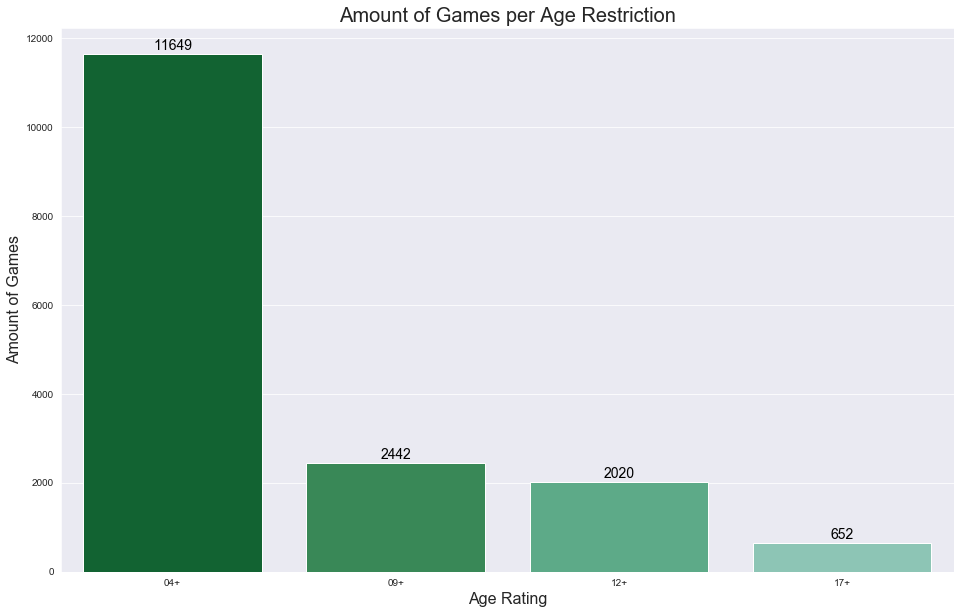

In [35]:
# Make the figure
plt.figure(figsize=(16,10))

# Make a countplot
palette6 = sns.color_palette("BuGn_r")
age_vis = sns.countplot(x=app_df_clean["Age Rating"], order=["04+", "09+", "12+", "17+"], palette=palette6)
age_vis.set_xlabel("Age Rating", fontsize=16)
age_vis.set_ylabel("Amount of Games", fontsize=16)
age_vis.set_title("Amount of Games per Age Restriction", fontsize=20)

# Write the height of the bars on top
for p in age_vis.patches:
    age_vis.annotate("{:.0f}".format(p.get_height()), 
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=14, color='black', xytext=(0, 8),
                        textcoords='offset points')
    
# Save the image.
#plt.savefig("Amount_Games_Per_Age.png", dpi=300)

> **Most of the apps are in the +4 age category, which can be translated as "everyone can play". This ensures that the developers are targeting a much broader audience with their games.**

# Languages
> Do most games have various choices of languages?

In [31]:
# Create a new column that contains the amount of languages that app has available
app_df_clean["numLang"] = app_df_clean["Languages"].apply(lambda x: len(x.split(",")))

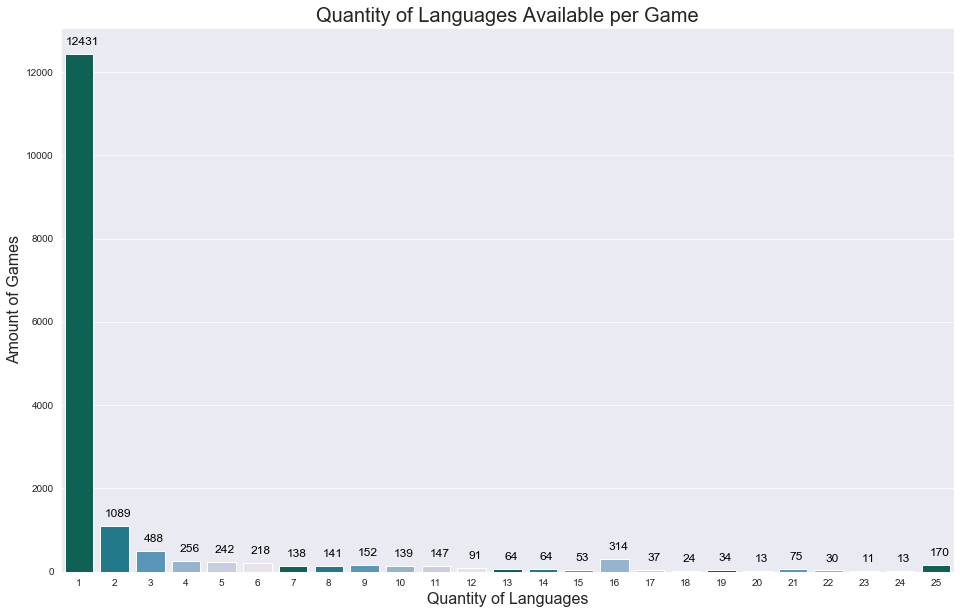

In [32]:
#Make the figure
plt.figure(figsize=(16,10))

#Variables
lang = app_df_clean.loc[app_df_clean["numLang"] <= 25, "numLang"]

#Plot a countplot
palette7 = sns.color_palette("PuBuGn_r")
numLang_vis = sns.countplot(x=lang, data=app_df_clean, palette=palette7)
numLang_vis.set_xlabel("Quantity of Languages", fontsize=16)
numLang_vis.set_ylabel("Amount of Games", fontsize=16)
numLang_vis.set_title("Quantity of Languages Available per Game", fontsize=20)

# Write the height of the bars on top
for p in numLang_vis.patches:
    numLang_vis.annotate("{:.0f}".format(p.get_height()), 
                        (p.get_x() + p.get_width() / 2. + .1, p.get_height()),
                        ha='center', va='center', fontsize=12, color='black', xytext=(0, 12),
                        textcoords='offset points')
    
# Save the image.
#plt.savefig("Quantity_Lang_Per_Game.png", dpi=300)

In [33]:
#Amount of games that have only the English language
len(app_df_clean[(app_df_clean["numLang"] == 1) & (app_df_clean["Languages"] == "EN")])

12334

In [34]:
#Amount of games that have only one language and is not English
len(app_df_clean[(app_df_clean["numLang"] == 1) & (app_df_clean["Languages"] != "EN")])

97

> **The vast majority of the games - 12.431 - have only one language available and more than 99% of these use the English language. After that, there is a huge drop and only 1089 games have two languages available. Note that not all the data is shown in the graph above, but games with more than 25 languages were left out and they don't represent a huge number overall. It is interesting to point out that there is a strange increase in the number of games with 16 languages and then another one when we reach 25 languages. The explanation for that is unknown and it will not be investigated in this notebook.**